In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.7.2 anndata==0.7.5 umap==0.5.1 numpy==1.19.5 scipy==1.6.2 pandas==1.1.5 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [3]:
results_file = 'write/testis_220304.h5ad'

In [10]:
adata = sc.read_10x_mtx(
    '/mnt/d/Sambe/GSM3526588/',  # the directory with the `.mtx` file
    # use gene symbols for the variable names (variables-axis index)
    cache=True)           

... reading from cache file cache/mnt-d-Sambe-GSM3526588-matrix.h5ad


In [11]:
adata

AnnData object with n_obs × n_vars = 4955 × 32738
    var: 'gene_ids', 'feature_types'

In [6]:
adata.obs

""
AAACCTGAGCGATTCT-1
AAACCTGAGCGTTTAC-1
AAACCTGAGGACAGAA-1
AAACCTGAGTCCATAC-1
AAACCTGCAACACGCC-1
...
TTTGTCACATCACCCT-1
TTTGTCAGTAGCTGCC-1
TTTGTCATCTAAGCCA-1
TTTGTCATCTACTATC-1


In [12]:
adata.var

,gene_ids,feature_types
MIR1302-10,ENSG00000243485,Gene Expression
FAM138A,ENSG00000237613,Gene Expression
OR4F5,ENSG00000186092,Gene Expression
RP11-34P13.7,ENSG00000238009,Gene Expression
RP11-34P13.8,ENSG00000239945,Gene Expression
...,...,...
AC145205.1,ENSG00000215635,Gene Expression
BAGE5,ENSG00000268590,Gene Expression
CU459201.1,ENSG00000251180,Gene Expression
AC002321.2,ENSG00000215616,Gene Expression


normalizing counts per cell
    finished (0:00:00)


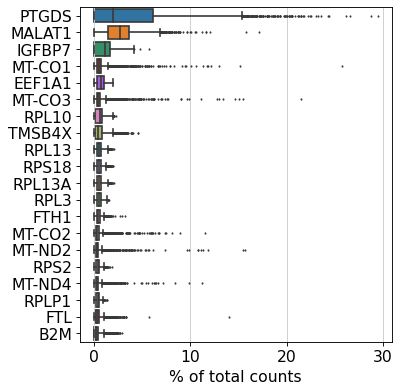

In [13]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [14]:
adata.var['mt'] = adata.var_names.str.startswith('MT-') 

In [15]:
adata.var

,gene_ids,feature_types,mt
MIR1302-10,ENSG00000243485,Gene Expression,False
FAM138A,ENSG00000237613,Gene Expression,False
OR4F5,ENSG00000186092,Gene Expression,False
RP11-34P13.7,ENSG00000238009,Gene Expression,False
RP11-34P13.8,ENSG00000239945,Gene Expression,False
...,...,...,...
AC145205.1,ENSG00000215635,Gene Expression,False
BAGE5,ENSG00000268590,Gene Expression,False
CU459201.1,ENSG00000251180,Gene Expression,False
AC002321.2,ENSG00000215616,Gene Expression,False


In [16]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [17]:
adata

AnnData object with n_obs × n_vars = 4955 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

... storing 'feature_types' as categorical


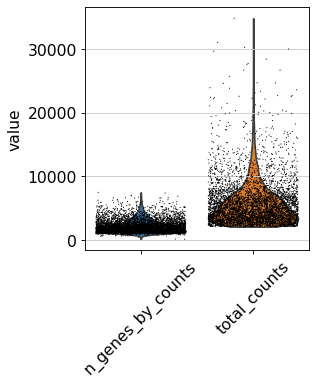

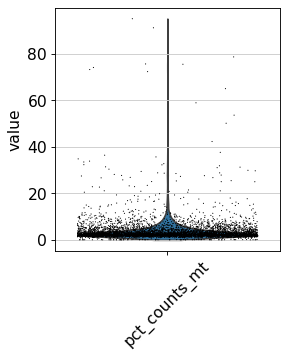

In [18]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'], jitter=0.4, rotation= 45)
sc.pl.violin(adata, ['pct_counts_mt'], jitter=0.4, rotation= 45)

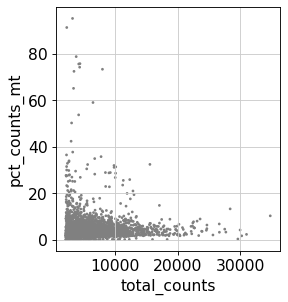

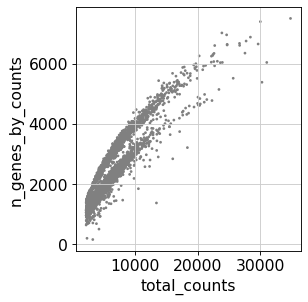

In [20]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [21]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACCTGAGCGATTCT-1,2112,5928.0,101.0,1.703779
AAACCTGAGCGTTTAC-1,3743,8950.0,403.0,4.502793
AAACCTGAGGACAGAA-1,1588,4337.0,112.0,2.582430
AAACCTGAGTCCATAC-1,2783,5283.0,391.0,7.401098
AAACCTGCAACACGCC-1,4327,11135.0,708.0,6.358330
...,...,...,...,...
TTTGTCACATCACCCT-1,1592,2644.0,496.0,18.759455
TTTGTCAGTAGCTGCC-1,2225,4007.0,256.0,6.388819
TTTGTCATCTAAGCCA-1,1627,3926.0,97.0,2.470708
TTTGTCATCTACTATC-1,1475,2420.0,363.0,15.000001


In [22]:
adata = adata[adata.obs['pct_counts_mt'] < 10, :]

In [23]:
adata

View of AnnData object with n_obs × n_vars = 4762 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [24]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

Trying to set attribute `.obs` of view, copying.
filtered out 9208 genes that are detected in less than 3 cells


In [25]:
adata

AnnData object with n_obs × n_vars = 4762 × 23530
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

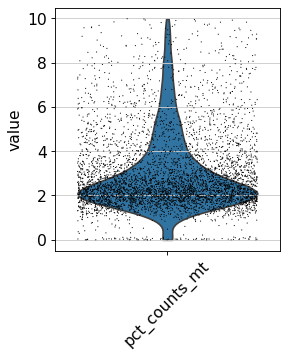

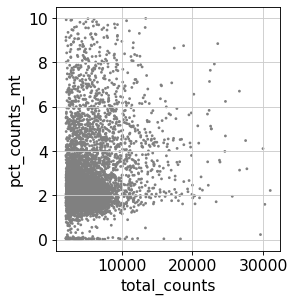

In [26]:
sc.pl.violin(adata, ['pct_counts_mt'], jitter=0.4, rotation= 45)
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')

In [27]:
adata.raw = adata

In [28]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
sc.pp.scale(adata)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.26
Detected doublet rate = 4.2%
Estimated detectable doublet fraction = 66.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 6.4%
Elapsed time: 4.5 seconds


201

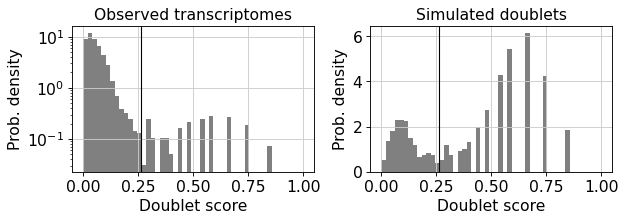

In [29]:
import scrublet as scr
scrub = scr.Scrublet(adata.raw.X)
adata.obs['doublet_scores'], adata.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

sum(adata.obs['predicted_doublets'])

In [30]:
adata.obs['doublet_info'] = adata.obs["predicted_doublets"].astype(str)
# 文字にしておく、後の操作のために

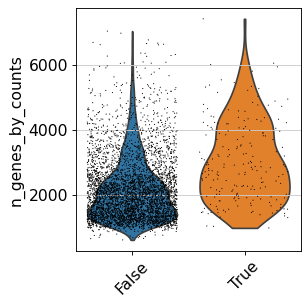

In [33]:
sc.pl.violin(adata, 'n_genes_by_counts',
             jitter=0.4, groupby = 'doublet_info', rotation=45)
#オプションのつけ方は、API

In [34]:
adata = adata.raw.to_adata() 

adata = adata[adata.obs['doublet_info'] == 'False',:]
print(adata.shape)

(4561, 23530)


In [35]:
adata.write(results_file)